




,,0
,00




































0,0,,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      8**Análise de Dados - COVID 19**

In [ ]:
#1) Alterar a exclusão das colunas do dataset antes de correlacionar por algoritmo sem informar a coluna manualmente;

#2) Mapa de Calor após retirada de novas colunas do dataset

#3) Inferência dos Valores de Resultado - estudar melhor

#4) Realizar Dados categóricos para numéricos utilizando pandas get_dummies

#5) Criar modelo de Regressão Linear - PENDENTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install openpyxl==3.0.0

In [ ]:
dataset = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)

In [ ]:
dataset.shape

(685, 188)

In [ ]:
dataset.head(5)

,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,...,DATA 1ª DOSE,DATA 2ª DOSE,INFECCAO POS VACINA,SRAG,Desfecho,Data do Desfecho,Local do óbito,Município do óbito,Início dos sintomas - desfecho,internação - desfecho
0,UTI HU,01,2020-08-08 00:00:00,GRAVE,GRAVE,CRITICO,CRITICO,1965-08-18 00:00:00,55.0,FEMININO,...,99999,99999,99999,SIM,RECUPERADO,2020-08-09 00:00:00,99999,99999,27.0,16.0
1,UTI HU,02,2020-08-11 00:00:00,OBITO,GRAVE,CRITICO,CRITICO,1952-05-20 00:00:00,68.0,MASCULINO,...,99999,99999,NaN,SIM,OBITO,2020-08-15 00:00:00,HU UNIVASF,PETROLINA-PE,41.0,32.0
2,UTI HU,03,2020-08-12 00:00:00,OBITO,GRAVE,CRITICO,CRITICO,1959-12-15 00:00:00,60.0,FEMININO,...,99999,99999,99999,SIM,OBITO,2020-08-26 00:00:00,HU UNIVASF,PETROLINA-PE,29.0,20.0
3,UTI HU,04,2020-08-12 00:00:00,OBITO,GRAVE,CRITICO,CRITICO,1943-05-08 00:00:00,77.0,MASCULINO,...,99999,99999,99999,SIM,OBITO,2020-08-12 00:00:00,HU UNIVASF,PETROLINA-PE,13.0,4.0
4,UTI HU,06,2020-08-13 00:00:00,OBITO,GRAVE,CRITICO,CRITICO,1991-12-06 00:00:00,28.0,MASCULINO,...,99999,99999,99999,SIM,OBITO,2020-09-01 00:00:00,HU UNIVASF,PETROLINA-PE,31.0,23.0


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
dataset.replace(99999, np.nan, inplace = True)
dataset.replace(99999.0, np.nan, inplace = True)

In [ ]:
#cria um dataset com campos e seus % de registros nulos
#dataset.isnull().sum()
teste = (dataset.isnull().sum()/dataset.shape[0]) * 100

In [ ]:
#Cria um dataframe do dataset teste de nulos
teste1 = pd.DataFrame(teste,columns=list('A'))

In [ ]:
teste1.head(10)

,A
ORIGEM DA AMOSTRA,0.145985
Nº INTERNO,0.145985
Data da coleta,0.291971
Classif. OMS,3.941606
Classif. OMS modif.,4.233577
Classif. NIH,5.693431
Classif. Guideline (7th ed.),5.693431
Data Nascimento,0.291971
Idade (anos),0.437956
Sexo,0.437956


In [ ]:
#reindexa o dataframe criado
teste1.reset_index(level=0, inplace=True)

In [ ]:
#visualiza o dataframe indexado
teste1.head(5)

,index,A
0,ORIGEM DA AMOSTRA,0.145985
1,Nº INTERNO,0.145985
2,Data da coleta,0.291971
3,Classif. OMS,3.941606
4,Classif. OMS modif.,4.233577


In [ ]:
#Renomeia as Colunas do dataframe criado
teste1 = teste1.rename(columns={'index':'Campos','A': 'Valores'})

In [ ]:
teste1.columns

Index(['Campos', 'Valores'], dtype='object')

In [ ]:
#Visualiza dataframe com colunas renomeadas

#Desativa do pandas limites de linhas e colunas para exibição
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#Carrega dados do dataframe
teste1.head(5)

,Campos,Valores
0,ORIGEM DA AMOSTRA,0.145985
1,Nº INTERNO,0.145985
2,Data da coleta,0.291971
3,Classif. OMS,3.941606
4,Classif. OMS modif.,4.233577


In [ ]:
#Campos com mais de 30% nulos
teste1.loc[teste1['Valores']>30]

,Campos,Valores
10,Ocupação,76.934307
11,Escolaridade,74.744526
12,Raça/Cor,45.985401
13,Tipo Sanguíneo,83.065693
38,Outros,55.620438
41,D2,87.445255
42,DATA D2,87.445255
43,D3,97.810219
44,DATA D3,97.664234
45,Vacina influenza,69.781022


In [ ]:
#deleta do dataframe os campos com menos de 30% de nulos
#para retirar apenas os maiores de 30% do dataset
teste1.drop(teste1.loc[teste1['Valores']<30].index, inplace=True)

In [ ]:
#dataset.drop(['Ocupação','Escolaridade','Raça/Cor','Tipo Sanguíneo','Tempo de Internação (dias)','Outros','Data aplicação.1','Temp. máx (°C)','Pressão DIASTOLICA + baixa','F.R mais alta','F.C mais alta','Saturação O2 mais baixa','FiO2 (%)','PH','PCO2','PO2','LAC','HCO3 / BIC','SATO2/SO2','IO / REL / P/F','Glicemia (HGT)','Neutrófilos (nº/μL)','Neutrófilos (%)','Linfócitos (nº)','Linfócitos (%)','Monócitos (n°)','Monócitos (%)','Razão neutrófilo-linfocito (RNL)','Razão monócito-linfócito (RML)','TTPA', 'Albumina (g/dL)', 'TGO (U/L)', 'TGP', 'BILIRRUBINA TOTAL (MG/DL)','BILIRRUBINA DIRETA (MG/DL)', 'BILIRRUBINA INDIRETA (MG/DL)','Creatinina','CKMB (NG/ML)','LDH (U/L)','Proteína C reativa (mg/L)','TROPONINA T (MC)','UREIA (mg/dL)','INR','Gama Glutamil Transferase (GGT)','Cq_E','Cq_OR','Cq_N','Data do teste rápido','IgG','IgM','Resultado','Método','IgG.1','IgM.1','Anticorpos totais','Data','Resultado.1','DATA','RESULTADO','Broncodilatador','Outros (ex: Ivermectina)','APRESENTOU COMPLICAÇOES','SE SIM, QUAIS?','TOMOU VACINA COVID-19?','SE SIM, QUAL?','DATA 1ª DOSE','DATA 2ª DOSE','INFECCAO POS VACINA','Local do óbito','Município do óbito','Início dos sintomas - desfecho','internação - desfecho'], axis=1)#Deleta do dataset colunas 
for ind in teste1.index:
  dataset = dataset.drop(teste1['Campos'][ind], axis=1)

In [ ]:
#retirar os 9999 restantes por média ou norma

In [ ]:
dataset.head(2)

,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho
0,UTI HU,01,2020-08-08,GRAVE,GRAVE,CRITICO,CRITICO,1965-08-18 00:00:00,55.0,FEMININO,SANTA MARIA DA BOA VISTA-PE,15.0,29/2020,2020-07-13 00:00:00,2020-07-24,SIM,NAO,SIM,NAO,SIM,SIM,SIM,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,SIM,SIM,NAO,NAO,PNEUMONIA VIRAL NAO ESPECIFICADA (J12.9),2020-07-24 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,38.6,103.0,57.0,28.0,102.0,90.0,NaN,SIM,SIM,SIM,SIM,NAO,NaN,NaN,NaN,NaN,SIM,NaN,14080.0,238000.0,35.7,0.5,13.8,37.9,SIM,NAO,NAO,NAO,SIM,"CEFTRIAXONA, AZITROMICINA",OSELTAMIVIR,"ENOXAPARINA, HEPARINA",BROMETO DE IPRATROPIO,NAO,DEXAMETASONA,SIM,RECUPERADO,2020-08-09 00:00:00,27.0,16.0
1,UTI HU,02,2020-08-11,OBITO,GRAVE,CRITICO,CRITICO,1952-05-20 00:00:00,68.0,MASCULINO,PETROLINA-PE,32.0,28/2020,2020-07-05 00:00:00,2020-07-14,SIM,NAO,NAO,SIM,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-07-14 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,37.1,111.0,55.0,22.0,85.0,85.0,SIM,NAO,SIM,SIM,NaN,SIM,NaN,NaN,NaN,NaN,NaN,426.0,10460.0,406000.0,72.0,1.2,247.0,33.5,SIM,NAO,NAO,NAO,SIM,"AZITROMICINA, MEROPENEM, PIPERACILINA + TAZOBA...",NAO,"ENOXAPARINA, HEPARINA",BROMETO DE IPRATROPIO,NAO,DEXAMETASONA,SIM,OBITO,2020-08-15 00:00:00,41.0,32.0


In [ ]:
dataset.head(1)

,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho
0,UTI HU,01,2020-08-08,GRAVE,GRAVE,CRITICO,CRITICO,1965-08-18 00:00:00,55.0,FEMININO,SANTA MARIA DA BOA VISTA-PE,15.0,29/2020,2020-07-13 00:00:00,2020-07-24,SIM,NAO,SIM,NAO,SIM,SIM,SIM,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,SIM,SIM,NAO,NAO,PNEUMONIA VIRAL NAO ESPECIFICADA (J12.9),2020-07-24 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,38.6,103.0,57.0,28.0,102.0,90.0,NaN,SIM,SIM,SIM,SIM,NAO,NaN,NaN,NaN,NaN,SIM,NaN,14080.0,238000.0,35.7,0.5,13.8,37.9,SIM,NAO,NAO,NAO,SIM,"CEFTRIAXONA, AZITROMICINA",OSELTAMIVIR,"ENOXAPARINA, HEPARINA",BROMETO DE IPRATROPIO,NAO,DEXAMETASONA,SIM,RECUPERADO,2020-08-09 00:00:00,27.0,16.0


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.describe().round(2)

,Idade (anos),Tempo de Internação (dias),Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Início dos sintomas - desfecho,internação - desfecho
count,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00,246.00
mean,51.41,7.91,37.38,102.87,63.41,28.38,108.44,89.28,166.38,9922.28,249493.90,53.45,0.90,112.20,33.87,17.13,8.23
std,14.20,8.73,1.08,15.46,12.74,7.52,31.58,5.44,69.28,11973.84,98629.68,43.44,0.59,92.75,22.05,10.16,9.24
min,20.00,1.00,34.00,44.00,10.00,16.00,55.00,53.00,63.00,420.00,8500.00,6.00,0.30,0.33,10.30,5.00,0.00
25%,41.00,3.00,36.60,94.00,60.00,23.00,92.25,88.00,118.00,5712.50,176750.00,23.92,0.64,41.75,21.60,11.00,3.00
50%,51.00,5.00,37.40,100.00,60.00,26.00,101.50,90.00,144.00,7750.00,230500.00,40.85,0.80,87.64,29.60,14.00,5.00
75%,61.00,9.00,38.18,110.00,70.00,32.00,117.75,93.00,195.00,10537.50,307000.00,70.12,1.00,161.57,38.00,19.00,9.00
max,86.00,52.00,40.00,144.00,98.00,63.00,443.00,99.00,384.00,140000.00,586000.00,290.00,6.50,405.00,204.80,61.00,52.00


In [ ]:
#Quais Colunas fazem sentido, retirar as demais
#Mapa de Calor após retirada de novas colunas
#Inferencia dos Valores de Resultado
#Dados categoricos para numericos utlizando pandas get_dummies (Exemplo o Sexo utilizar 0 ou 1 e outros campos com Sim ou Não)
#Criar modelo de Regressão Linear
#https://plotly.com/python/heatmaps/
#https://stackoverflow.com/questions/66572672/correlation-heatmap-in-plotly
dataset.corr().round(2)

,Idade (anos),Tempo de Internação (dias),Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Início dos sintomas - desfecho,internação - desfecho
Idade (anos),1.00,0.13,-0.01,-0.06,-0.09,-0.06,-0.02,-0.11,0.17,-0.09,-0.06,-0.09,0.06,0.05,0.29,0.17,0.14
Tempo de Internação (dias),0.13,1.00,0.44,-0.37,-0.34,0.44,0.44,-0.39,0.09,0.03,0.09,-0.10,0.11,0.14,0.27,0.83,0.91
Temp. máx (°C),-0.01,0.44,1.00,-0.39,-0.35,0.41,0.46,-0.33,-0.04,-0.01,-0.01,-0.01,0.16,0.23,0.23,0.35,0.39
Pressão SISTOLICA + baixa,-0.06,-0.37,-0.39,1.00,0.68,-0.30,-0.37,0.32,0.06,0.01,-0.09,-0.02,-0.10,-0.02,-0.21,-0.31,-0.31
Pressão DIASTOLICA + baixa,-0.09,-0.34,-0.35,0.68,1.00,-0.25,-0.30,0.31,-0.00,0.03,-0.00,-0.02,-0.08,-0.04,-0.18,-0.26,-0.29
F.R mais alta,-0.06,0.44,0.41,-0.30,-0.25,1.00,0.41,-0.38,0.04,0.05,0.24,0.01,0.13,0.22,0.17,0.39,0.41
F.C mais alta,-0.02,0.44,0.46,-0.37,-0.30,0.41,1.00,-0.31,0.02,0.03,0.05,0.03,0.11,0.18,0.20,0.37,0.39
Saturação O2 mais baixa,-0.11,-0.39,-0.33,0.32,0.31,-0.38,-0.31,1.00,-0.08,-0.03,0.00,0.06,-0.16,-0.21,-0.24,-0.38,-0.41
Glicemia (HGT),0.17,0.09,-0.04,0.06,-0.00,0.04,0.02,-0.08,1.00,-0.06,-0.07,-0.13,0.17,0.12,0.20,0.07,0.11
Leucócitos totais (/μL),-0.09,0.03,-0.01,0.01,0.03,0.05,0.03,-0.03,-0.06,1.00,0.04,0.04,0.02,0.04,0.03,0.06,0.04


In [ ]:
#após a correlacao precisamos salvar o dataset em novo arquivo
dataset2 = pd.DataFrame(dataset)

In [ ]:
dataset2.to_csv('nome_do_arquivo.csv')

In [ ]:
dataset3 = pd.read_csv('nome_do_arquivo.csv',encoding='utf-8')

In [ ]:
dataset3.head(2)

,Unnamed: 0,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho
0,47,MONTE CARMELO,60 / A1887,2020-11-26,MODERADO,MODERADO,GRAVE,MODERADO,1960-12-30 00:00:00,60.0,MASCULINO,PETROLINA-PE,2.0,46/2020,2020-11-14 00:00:00,2020-11-25,SIM,NAO,SIM,SIM,SIM,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-25 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,36.9,110.0,70.0,28.0,76.0,91.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,248.0,15090.0,233000.0,31.2,1.01,98.07,38.6,SIM,SIM,NAO,NAO,SIM,CEFTRIAXONA,OSELTAMIVIR,ENOXAPARINA,SALBUTAMOL,NAO,DEXAMETASONA,NAO,RECUPERADO,2020-11-27 00:00:00,13.0,2.0
1,49,MONTE CARMELO,66,2020-11-30,MODERADO,MODERADO,GRAVE,MODERADO,1972-06-02 00:00:00,48.0,MASCULINO,PETROLINA-PE,7.0,48/2020,2020-11-23 00:00:00,2020-11-30,NAO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-30 00:00:00,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,36.6,110.0,60.0,26.0,96.0,88.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,162.0,9430.0,155000.0,39.0,1.26,15.40,25.8,NAO,SIM,NAO,SIM,NAO,AZITROMCIINA,NAO,ENOXAPARINA,SALBUTAMOL,SIM,DEXAMETASONA,NAO,RECUPERADO,2020-12-07 00:00:00,14.0,7.0


In [ ]:
dataset3 = dataset3[['Unnamed: 0',
 'ORIGEM DA AMOSTRA',
 'Nº INTERNO',
 'Data da coleta',
 'Classif. OMS modif.',
 'Classif. NIH',
 'Classif. Guideline (7th ed.)',
 'Data Nascimento',
 'Idade (anos)',
 'Sexo',
 'Município de Residencia',
 'Tempo de Internação (dias)',
 'Semana Epidemiológica',
 'Data início dos sintomas',
 'Data internação',
 'Febre',
 'Dor de garganta',
 'Tosse seca',
 'Tosse produtiva',
 'Dispnéia / Desconforto respiratório',
 'Astenia',
 'Cefaleia',
 'Saturação de O2 <95',
 'Mal estar geral',
 'Dor em articulações',
 'Dor muscular',
 'Dor abdominal',
 'Diarreia',
 'Vômitos',
 'Alteração do olfato e do paladar',
 'Coriza / Congestão Nasal',
 'Aperto torácico',
 'Dor no corpo',
 'Nauseas',
 'D1',
 'DATA D1',
 'Síndrome de Down',
 'Diabetes',
 'HAS',
 'HIV',
 'Doença cardíaca crônica',
 'Doença hepática crônica',
 'Doença renal crônica',
 'Doença hematológica crônica',
 'Neoplasia',
 'Pneumopatia crônica',
 'Asma',
 'DPOC',
 'Bronquiectasia',
 'DPID',
 'Tuberculose',
 'Doença reumatológica',
 'Obesidade',
 'Uso de imunossupressor',
 'Doença congênita',
 'Desnutrição',
 'Temp. máx (°C)',
 'Pressão SISTOLICA + baixa ',
 'Pressão DIASTOLICA + baixa',
 'F.R mais alta',
 'F.C mais alta',
 'Saturação O2 mais baixa',
 'Fez pelo menos um Rx/TC de tórax?',
 'Suplementação de O2',
 'Suporte ventilatório',
 'Medicação vasopressora',
 'Diálise/hemodiálise',
 'Parada cardiorespiratório',
 'Sepsis',
 'Choque',
 'Falência miocárdica',
 'Infarto miocárdio',
 'Insuficiência renal',
 'Glicemia (HGT)',
 'Leucócitos totais (/μL)',
 ' Plaquetas',
 'TGP',
 'Creatinina',
 'Proteína C reativa (mg/L)',
 'UREIA (mg/dL)',
 'Realizou PCR?',
 'Realizou Teste Rápido (ANTICORPO)?',
 'Realizou Exame Sorológico?',
 'Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?',
 'Foi administrado algum antiviral ou antibiótico na internação?',
 'Antibiótico',
 'Antiviral (Oseltamivir)',
 'Anticoagulante (Enoxaparina ou Análogo)',
 'Broncodilatador',
 'Cloroquina / Hidroxicloroquina',
 'Corticoterapia',
 'SRAG',
 'Desfecho',
 'Data do Desfecho',
 'Início dos sintomas - desfecho',
 'internação - desfecho',
 'Classif. OMS']]

In [ ]:
dataset3.head(2)

,Unnamed: 0,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho,Classif. OMS
0,47,MONTE CARMELO,60 / A1887,2020-11-26,MODERADO,GRAVE,MODERADO,1960-12-30 00:00:00,60.0,MASCULINO,PETROLINA-PE,2.0,46/2020,2020-11-14 00:00:00,2020-11-25,SIM,NAO,SIM,SIM,SIM,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-25 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,36.9,110.0,70.0,28.0,76.0,91.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,248.0,15090.0,233000.0,31.2,1.01,98.07,38.6,SIM,SIM,NAO,NAO,SIM,CEFTRIAXONA,OSELTAMIVIR,ENOXAPARINA,SALBUTAMOL,NAO,DEXAMETASONA,NAO,RECUPERADO,2020-11-27 00:00:00,13.0,2.0,MODERADO
1,49,MONTE CARMELO,66,2020-11-30,MODERADO,GRAVE,MODERADO,1972-06-02 00:00:00,48.0,MASCULINO,PETROLINA-PE,7.0,48/2020,2020-11-23 00:00:00,2020-11-30,NAO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-30 00:00:00,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,36.6,110.0,60.0,26.0,96.0,88.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,162.0,9430.0,155000.0,39.0,1.26,15.40,25.8,NAO,SIM,NAO,SIM,NAO,AZITROMCIINA,NAO,ENOXAPARINA,SALBUTAMOL,SIM,DEXAMETASONA,NAO,RECUPERADO,2020-12-07 00:00:00,14.0,7.0,MODERADO


In [ ]:
dataset3.shape

(246, 97)

In [ ]:
dataset3.head(2)

,Unnamed: 0,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho,Classif. OMS
0,47,MONTE CARMELO,60 / A1887,2020-11-26,MODERADO,GRAVE,MODERADO,1960-12-30 00:00:00,60.0,MASCULINO,PETROLINA-PE,2.0,46/2020,2020-11-14 00:00:00,2020-11-25,SIM,NAO,SIM,SIM,SIM,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-25 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,36.9,110.0,70.0,28.0,76.0,91.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,248.0,15090.0,233000.0,31.2,1.01,98.07,38.6,SIM,SIM,NAO,NAO,SIM,CEFTRIAXONA,OSELTAMIVIR,ENOXAPARINA,SALBUTAMOL,NAO,DEXAMETASONA,NAO,RECUPERADO,2020-11-27 00:00:00,13.0,2.0,MODERADO
1,49,MONTE CARMELO,66,2020-11-30,MODERADO,GRAVE,MODERADO,1972-06-02 00:00:00,48.0,MASCULINO,PETROLINA-PE,7.0,48/2020,2020-11-23 00:00:00,2020-11-30,NAO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-30 00:00:00,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,36.6,110.0,60.0,26.0,96.0,88.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,162.0,9430.0,155000.0,39.0,1.26,15.40,25.8,NAO,SIM,NAO,SIM,NAO,AZITROMCIINA,NAO,ENOXAPARINA,SALBUTAMOL,SIM,DEXAMETASONA,NAO,RECUPERADO,2020-12-07 00:00:00,14.0,7.0,MODERADO


In [ ]:
#CountValues para colunes categoricas para mais de 1 valor
#Listar quais
#dataset3.drop(["ORIGEM DA AMOSTRA","Nº INTERNO","Data da coleta",'Classif. OMS modif.','Classif. NIH','Classif. Guideline (7th ed.)','Data Nascimento','Sexo','Município de Residencia','Semana Epidemiológica','Data início dos sintomas','Data internação','Febre','Dor de garganta','Tosse seca','Tosse produtiva','Dispnéia / Desconforto respiratório','Astenia','Cefaleia','Saturação de O2 <95','Mal estar geral','Dor em articulações','Dor muscular','Dor abdominal','Diarreia','Vômitos','Alteração do olfato e do paladar','Coriza / Congestão Nasal','Aperto torácico','Dor no corpo','Nauseas','D1','DATA D1','Síndrome de Down','Diabetes','HAS','HIV','Doença cardíaca crônica','Doença hepática crônica','Doença renal crônica','Doença hematológica crônica','Neoplasia','Pneumopatia crônica','Asma','DPOC','Bronquiectasia','DPID','Tuberculose','Doença reumatológica','Obesidade','Uso de imunossupressor','Doença congênita','Desnutrição','Fez pelo menos um Rx/TC de tórax?','Suplementação de O2','Suporte ventilatório','Medicação vasopressora','Diálise/hemodiálise','Parada cardiorespiratório','Sepsis','Choque','Falência miocárdica','Infarto miocárdio','Insuficiência renal','Realizou PCR?','Realizou Teste Rápido (ANTICORPO)?','Realizou Exame Sorológico?','Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?','Foi administrado algum antiviral ou antibiótico na internação?','Antibiótico','Antiviral (Oseltamivir)','Anticoagulante (Enoxaparina ou Análogo)','Broncodilatador','Cloroquina / Hidroxicloroquina','Corticoterapia','SRAG','Desfecho','Data do Desfecho'],inplace = True, axis=1)

In [ ]:
dataset3.head(1)

,Unnamed: 0,ORIGEM DA AMOSTRA,Nº INTERNO,Data da coleta,Classif. OMS modif.,Classif. NIH,Classif. Guideline (7th ed.),Data Nascimento,Idade (anos),Sexo,Município de Residencia,Tempo de Internação (dias),Semana Epidemiológica,Data início dos sintomas,Data internação,Febre,Dor de garganta,Tosse seca,Tosse produtiva,Dispnéia / Desconforto respiratório,Astenia,Cefaleia,Saturação de O2 <95,Mal estar geral,Dor em articulações,Dor muscular,Dor abdominal,Diarreia,Vômitos,Alteração do olfato e do paladar,Coriza / Congestão Nasal,Aperto torácico,Dor no corpo,Nauseas,D1,DATA D1,Síndrome de Down,Diabetes,HAS,HIV,Doença cardíaca crônica,Doença hepática crônica,Doença renal crônica,Doença hematológica crônica,Neoplasia,Pneumopatia crônica,Asma,DPOC,Bronquiectasia,DPID,Tuberculose,Doença reumatológica,Obesidade,Uso de imunossupressor,Doença congênita,Desnutrição,Temp. máx (°C),Pressão SISTOLICA + baixa,Pressão DIASTOLICA + baixa,F.R mais alta,F.C mais alta,Saturação O2 mais baixa,Fez pelo menos um Rx/TC de tórax?,Suplementação de O2,Suporte ventilatório,Medicação vasopressora,Diálise/hemodiálise,Parada cardiorespiratório,Sepsis,Choque,Falência miocárdica,Infarto miocárdio,Insuficiência renal,Glicemia (HGT),Leucócitos totais (/μL),Plaquetas,TGP,Creatinina,Proteína C reativa (mg/L),UREIA (mg/dL),Realizou PCR?,Realizou Teste Rápido (ANTICORPO)?,Realizou Exame Sorológico?,Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?,Foi administrado algum antiviral ou antibiótico na internação?,Antibiótico,Antiviral (Oseltamivir),Anticoagulante (Enoxaparina ou Análogo),Broncodilatador,Cloroquina / Hidroxicloroquina,Corticoterapia,SRAG,Desfecho,Data do Desfecho,Início dos sintomas - desfecho,internação - desfecho,Classif. OMS
0,47,MONTE CARMELO,60 / A1887,2020-11-26,MODERADO,GRAVE,MODERADO,1960-12-30 00:00:00,60.0,MASCULINO,PETROLINA-PE,2.0,46/2020,2020-11-14 00:00:00,2020-11-25,SIM,NAO,SIM,SIM,SIM,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-25 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,36.9,110.0,70.0,28.0,76.0,91.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,248.0,15090.0,233000.0,31.2,1.01,98.07,38.6,SIM,SIM,NAO,NAO,SIM,CEFTRIAXONA,OSELTAMIVIR,ENOXAPARINA,SALBUTAMOL,NAO,DEXAMETASONA,NAO,RECUPERADO,2020-11-27 00:00:00,13.0,2.0,MODERADO


In [ ]:
#dataset3.drop(['Unnamed: 0',"ORIGEM DA AMOSTRA","Nº INTERNO","Data da coleta",'Classif. OMS modif.','Classif. NIH','Classif. Guideline (7th ed.)','Data Nascimento','Município de Residencia','Semana Epidemiológica','Data início dos sintomas','Data internação','D1','DATA D1','D2','DATA D2','D3','DATA D3','Data aplicação','Vacina antipneumocócica','Data aplicação.1','Outra condição','Principais achados','Fez pelo menos um Rx/TC de tórax?','Suplementação de O2','Se sim, descrever qual a suplementação de O2','Se sim, descrever qual o suporte ventilatório','Se sim, descrever qual o suporte ventilatório','Sepsis','Choque','Outros.1','Glicemia (HGT)','Data do resultado da PCR','Realizou PCR?','Tipo de amostra','Teste realizado','Interpretação','Tipo de prova','Realizou Teste Rápido (ANTICORPO)?','Realizou Exame Sorológico?','Data','Realizou Teste de Pesquisa de Antígeno (SWAB RÁPIDO)?','DATA','Foi administrado algum antiviral ou antibiótico na internação?','Antibiótico','Antiviral (Oseltamivir)','Anticoagulante (Enoxaparina ou Análogo)','Broncodilatador','Cloroquina / Hidroxicloroquina','Corticoterapia','SRAG','Desfecho','Data do Desfecho','Início dos sintomas - desfecho','internação - desfecho'],inplace = True, axis=1)

In [ ]:
dataset3.shape

(246, 97)

In [ ]:
#Features/Previsores e a Target/Classe
previsores = dataset3.iloc[:, 0:96].values # da primeira coluna a penultima
classe     = dataset3.iloc[:,96].values # Coluna Classif OMS

In [ ]:
previsores = pd.DataFrame(previsores)

In [ ]:
previsores.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,47,MONTE CARMELO,60 / A1887,2020-11-26,MODERADO,GRAVE,MODERADO,1960-12-30 00:00:00,60.0,MASCULINO,PETROLINA-PE,2.0,46/2020,2020-11-14 00:00:00,2020-11-25,SIM,NAO,SIM,SIM,SIM,NAO,SIM,NAO,SIM,NAO,SIM,NAO,NAO,NAO,SIM,SIM,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-25 00:00:00,NAO,SIM,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,36.9,110.0,70.0,28.0,76.0,91.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,248.0,15090.0,233000.0,31.2,1.01,98.07,38.6,SIM,SIM,NAO,NAO,SIM,CEFTRIAXONA,OSELTAMIVIR,ENOXAPARINA,SALBUTAMOL,NAO,DEXAMETASONA,NAO,RECUPERADO,2020-11-27 00:00:00,13.0,2.0
1,49,MONTE CARMELO,66,2020-11-30,MODERADO,GRAVE,MODERADO,1972-06-02 00:00:00,48.0,MASCULINO,PETROLINA-PE,7.0,48/2020,2020-11-23 00:00:00,2020-11-30,NAO,NAO,SIM,NAO,SIM,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,NAO,INFECCAO POR CORONAVIRUS DE LOCALIZACAO NAO ES...,2020-11-30 00:00:00,NAO,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NAO,NAO,36.6,110.0,60.0,26.0,96.0,88.0,NAO,SIM,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,162.0,9430.0,155000.0,39.0,1.26,15.4,25.8,NAO,SIM,NAO,SIM,NAO,AZITROMCIINA,NAO,ENOXAPARINA,SALBUTAMOL,SIM,DEXAMETASONA,NAO,RECUPERADO,2020-12-07 00:00:00,14.0,7.0


In [ ]:
previsores = pd.get_dummies(previsores)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
#labelencoder = LabelEncoder()
#labelencoder.fit_transform(dataset3['Sexo'])

In [ ]:
#previsores[:,0] 

In [ ]:
#dataset3 = pd.get_dummies(dataset3)

In [ ]:
#Melhorar as colunar 
#quais retiradas e porque

In [ ]:
#previsores_treinamento fit_transform
#no teste usar previsores_teste apenas Fit depois do Fit_tranform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [ ]:
# from sklearn.model_selection import train_test_split
# previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,classe,test_size=0.30, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

modelLR = LogisticRegression(random_state=1)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_lr = []
logistic_models = []

logistic_models_grid = []
logistic_models_grid.append(modelLR)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  modelLR.fit(X_train, y_train)
  logistic_models.append(modelLR)
  # Calcular a matriz de confusão
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))
  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  precisao_lr.append( accuracy_score(y_test, modelLR.predict(X_test)) )

# imprimir o array de precisões
print(precisao_lr)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,logistic_models[2].predict(X_test), target_names=target_names))


[0.7432432432432432, 0.7432432432432432, 0.7567567567567568, 0.6486486486486487, 0.7297297297297297, 0.7432432432432432, 0.7567567567567568, 0.7162162162162162, 0.7972972972972973, 0.7162162162162162]
[[15 14  0]
 [ 0 40  0]
 [ 4  1  0]]
              precision    recall  f1-score   support

       GRAVE       0.73      0.53      0.62        30
    MODERADO       0.71      0.97      0.82        38
       OBITO       0.00      0.00      0.00         6

    accuracy                           0.72        74
   macro avg       0.48      0.50      0.48        74
weighted avg       0.66      0.72      0.67        74



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_neu = []
neural_models = []

neural_models_grid = []
neural_models_grid.append(model)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  model.fit(X_train, y_train)
  neural_models.append(model)
  # Calcular a matriz de confusão
  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(model.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))
  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_neu.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(model.predict(X_test))) )
  precisao_neu.append( accuracy_score(y_test, modelLR.predict(X_test)) )
# imprimir o array de precisões
print(precisao_neu)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,neural_models[1].predict(X_test), target_names=target_names))

[0.8783783783783784, 0.9864864864864865, 0.918918918918919, 0.8648648648648649, 0.9324324324324325, 0.918918918918919, 0.8783783783783784, 0.9594594594594594, 0.9324324324324325, 0.7162162162162162]
[[28  1  0]
 [ 0 40  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

       GRAVE       0.61      0.47      0.53        30
    MODERADO       0.71      0.84      0.77        38
       OBITO       0.00      0.00      0.00         6

    accuracy                           0.62        74
   macro avg       0.44      0.44      0.43        74
weighted avg       0.61      0.62      0.61        74



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,ShuffleSplit


kf = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

for train_index, test_index in kf.split(previsores,classe):
  param_grid = {
      'bootstrap': [True, False],
      'max_depth': [20,25,100],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [2, 5],
      'n_estimators': [100, 200]
  }

  classifier = RandomForestClassifier()
  grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                            cv = 10, n_jobs = -1, verbose = 2)
  
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  
  grid_search.fit(X_train, y_train)
  print(grid_search.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

# rede neural (nesse ponto tem que experimentar outras arquiteturas da rede #hidden_layer_sizes)
modelRF = RandomForestClassifier(bootstrap = False, max_depth = 100, 
                                    max_features = 'sqrt', min_samples_leaf = 3,
                                    min_samples_split = 5, n_estimators = 100)

# Aqui vou guardar as matrizes de confusão
conf_matrix_list_of_arrays = []
# Usar kfold para separar os índices de treino e de teste

#kf = KFold(n_splits=5, random_state=10, shuffle=True)

kf = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

# Guardar as precisões de 10 rodadas
precisao_rf = []
florest_models = []

florest_models_grid = []
florest_models_grid.append(modelRF)

# loop das 10 rodadas
for train_index, test_index in kf.split(previsores,classe):
  #Separação em treino e teste
  X_train, X_test = previsores[train_index], previsores[test_index]
  y_train, y_test = classe[train_index], classe[test_index]
  # Treinar o modelo
  modelRF.fit(X_train, y_train)
  florest_models.append(modelRF)
  # Calcular a matriz de confusão
  
  #conf_matrix = confusion_matrix(lb.inverse_transform(y_test),lb.inverse_transform(modelRF.predict(X_test)))
  conf_matrix = confusion_matrix(y_test,modelLR.predict(X_test))

  # Guardar a matriz de confusão
  conf_matrix_list_of_arrays.append(conf_matrix)
  # Guardar a precisão
  #precisao_rf.append( accuracy_score(lb.inverse_transform(y_test), lb.inverse_transform(modelRF.predict(X_test))) )
  precisao_rf.append( accuracy_score(y_test, modelLR.predict(X_test)) )

#Porque validacao cruzada

# imprimir o array de precisões
print(precisao_rf)
# imprimir as matrizes de confusão (nesse caso estou imprimindo a matriz que o modelo teve a melhor acurácia)
print(conf_matrix_list_of_arrays[1])

target_names = np.unique(classe)
print(classification_report(y_test,florest_models[1].predict(X_test), target_names=target_names))

[0.8783783783783784, 0.9864864864864865, 0.918918918918919, 0.8648648648648649, 0.9324324324324325, 0.918918918918919, 0.8783783783783784, 0.9594594594594594, 0.9324324324324325, 0.7162162162162162]
[[28  1  0]
 [ 0 40  0]
 [ 0  0  5]]
              precision    recall  f1-score   support

       GRAVE       0.79      0.63      0.70        30
    MODERADO       0.77      0.97      0.86        38
       OBITO       1.00      0.33      0.50         6

    accuracy                           0.78        74
   macro avg       0.85      0.65      0.69        74
weighted avg       0.80      0.78      0.77        74



In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rf in florest_models_grid:
  for rl in logistic_models_grid:
    #t, p = paired_ttest_5x2cv(estimator1=rl,estimator2=rf,X=previsores, y=lb.inverse_transform(classe))
    t, p = paired_ttest_5x2cv(estimator1=rl,estimator2=rf,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -1.577
aplha  0.05
p value: 0.176
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rf in florest_models_grid:
  for nc in neural_models_grid:
    t, p = paired_ttest_5x2cv(estimator1=nc,estimator2=rf,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -3.430
aplha  0.05
p value: 0.019
Reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# esse for é usado pra escolher qual dos modelos treinados rejeita a hipótese nula
for rl in logistic_models_grid:
  for nc in neural_models_grid:
    t, p = paired_ttest_5x2cv(estimator1=nc,estimator2=rl,X=previsores, y=classe)
    alpha = 0.05

    print('t statistic: %.3f' % t)
    print('aplha ', alpha)
    print('p value: %.3f' % p)

    if p > alpha:
      print("Fail to reject null hypotesis")
    else:
      print("Reject null hypotesis")

t statistic: -1.452
aplha  0.05
p value: 0.206
Fail to reject null hypotesis


**Intervalos de confiança para métricas de desempenho com o método de bootstrap**

In [ ]:
#print(neural_models[1].predict(X_test))
#print(modelLR.predict(X_test))
#print(florest_models[1].predict(X_test))

In [ ]:
# Intervalo de confiança

# 1- Para a regressão logística

import numpy as np                                                         
import scipy as sp                                                         
import scipy.stats                                                         

conjunto = X_test                 
                                           
dicionario = []
for elemento in logistic_models[2].predict(X_test):
  if str(elemento).find("GRAVE") != -1 :
    dicionario.append(3)
  if str(elemento).find("MODERADO") != -1 :
    dicionario.append(1)
  if str(elemento).find("LEVE") != -1 :
    dicionario.append(-1)
  if str(elemento).find("OBITO") != -1 :
    dicionario.append(-3)

conf_int = scipy.stats.norm.interval(0.95, loc=dicionario) 

print("intervalo de confiança Regressão Logística: ")
print(conf_int)

intervalo de confiança Regressão Logística: 
(array([-0.95996398,  1.04003602, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398,  1.04003602, -0.95996398,  1.04003602,
       -0.95996398,  1.04003602, -0.95996398, -0.95996398, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398, -0.95996398,  1.04003602,  1.04003602,
        1.04003602, -0.95996398, -0.95996398,  1.04003602, -0.95996398,
       -0.95996398, -0.95996398, -0.95996398,  1.04003602,  1.04003602,
       -0.95996398, -0.95996398,  1.04003602, -0.95996398, -0.95996398,
       -0.95996398, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
        1.04003602, -0.95996398,  1.04003602, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
       -0.95996398, -0.95996398, -0.95996398,  1.04003602, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398

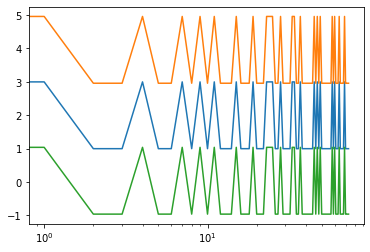

In [ ]:
# Gráfico do intervalo

numero_outputs = len(dicionario)

c=0
eixo_x = []
for elemento in dicionario:
  eixo_x.append(c)
  c = c+1

limite_superior = conf_int[1]
limite_inferior = conf_int[0]

plt.xscale('log')
plt.plot(eixo_x,dicionario)
plt.plot(eixo_x,limite_superior)
plt.plot(eixo_x,limite_inferior)

In [ ]:
# Intervalo de confiança -Arthur

# 2- Para a rede neural

import numpy as np                                                         
import scipy as sp                                                         
import scipy.stats                                                         

conjunto = X_test                 
                                           
dicionario = []
for elemento in neural_models[1].predict(X_test):
  if str(elemento).find("GRAVE") != -1 :
    dicionario.append(3)
  if str(elemento).find("MODERADO") != -1 :
    dicionario.append(1)
  if str(elemento).find("LEVE") != -1 :
    dicionario.append(-1)
  if str(elemento).find("OBITO") != -1 :
    dicionario.append(-3)

conf_int = scipy.stats.norm.interval(0.95, loc=dicionario) 

print("intervalo de confiança Rede Neural: ")
print(conf_int)

intervalo de confiança Rede Neural: 
(array([-0.95996398,  1.04003602, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398, -4.95996398, -0.95996398,  1.04003602,
       -0.95996398,  1.04003602,  1.04003602, -0.95996398,  1.04003602,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
        1.04003602, -0.95996398, -0.95996398,  1.04003602, -4.95996398,
       -0.95996398, -0.95996398, -0.95996398,  1.04003602,  1.04003602,
       -0.95996398, -0.95996398,  1.04003602,  1.04003602, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
        1.04003602, -0.95996398,  1.04003602, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
       -0.95996398, -0.95996398,  1.04003602,  1.04003602,  1.04003602,
        1.04003602, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
       -0.95996398, -0.959

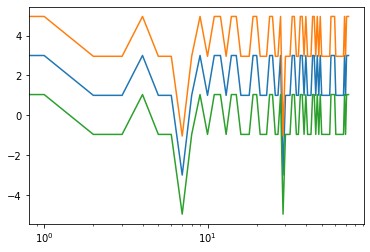

In [ ]:
# Gráfico do intervalo

numero_outputs = len(dicionario)

c=0
eixo_x = []
for elemento in dicionario:
  eixo_x.append(c)
  c = c+1

limite_superior = conf_int[1]
limite_inferior = conf_int[0]

plt.xscale('log')
plt.plot(eixo_x,dicionario)
plt.plot(eixo_x,limite_superior)
plt.plot(eixo_x,limite_inferior)

In [ ]:
# Intervalo de confiança -Arthur

# 3- Para a random forest

import numpy as np                                                         
import scipy as sp                                                         
import scipy.stats                                                         

conjunto = X_test                 
                                           
dicionario = []
for elemento in florest_models[1].predict(X_test):
  if str(elemento).find("GRAVE") != -1 :
    dicionario.append(3)
  if str(elemento).find("MODERADO") != -1 :
    dicionario.append(1)
  if str(elemento).find("LEVE") != -1 :
    dicionario.append(-1)
  if str(elemento).find("OBITO") != -1 :
    dicionario.append(-3)

conf_int = scipy.stats.norm.interval(0.95, loc=dicionario) 

print("intervalo de confiança Random florest: ")
print(conf_int)

intervalo de confiança Random florest: 
(array([-0.95996398,  1.04003602, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398,  1.04003602,  1.04003602, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398,  1.04003602, -0.95996398, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
        1.04003602, -0.95996398, -0.95996398,  1.04003602,  1.04003602,
       -0.95996398, -0.95996398, -4.95996398,  1.04003602,  1.04003602,
       -0.95996398, -0.95996398, -0.95996398,  1.04003602, -0.95996398,
       -0.95996398, -0.95996398,  1.04003602, -0.95996398, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
        1.04003602, -0.95996398, -0.95996398, -0.95996398,  1.04003602,
       -0.95996398, -0.95996398, -0.95996398, -0.95996398, -0.95996398,
        1.04003602, -0.95996398,  1.04003602,  1.04003602,  1.04003602,
        1.04003602,  1.04003602, -0.95996398, -0.95996398, -4.95996398,
       -0.95996398, -0.

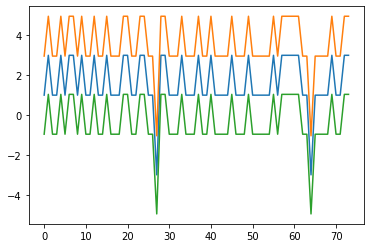

In [ ]:
# Gráfico do intervalo

numero_outputs = len(dicionario)

c=0
eixo_x = []
for elemento in dicionario:
  eixo_x.append(c)
  c = c+1

limite_superior = conf_int[1]
limite_inferior = conf_int[0]

plt.plot(eixo_x,dicionario)
plt.plot(eixo_x,limite_superior)
plt.plot(eixo_x,limite_inferior)